# Neural_network_two_layer

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import heapq

%matplotlib inline

In [2]:
#Load MNIST data
mnist = fetch_mldata('MNIST original')#, data_home = custom_data_home)
X, y = mnist.data.astype(float) , mnist.target.astype(int)


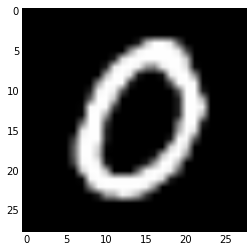

0


In [3]:
#Show a number
fig_n = 300
plt.imshow(X[fig_n,:].reshape(28,28), cmap="Greys_r")
plt.show()
print y[fig_n]


#print mnist.data.shape[0], np.shape(X_train)
#print mnist.target.shape
#print np.unique(mnist.target)
#print mnist.data.shape[1]

1.Preprocessing

In [4]:
#Check data distribution
y_dict = {}

for i in y:
    if y_dict.get(i) is None:
        y_dict[i] = 1
    else:
        y_dict[i] += 1

for key, value in y_dict.items():
    y_dict[key] = value / float(len(y))
    print '%d : %.3f' %(key, y_dict[key])


0 : 0.099
1 : 0.113
2 : 0.100
3 : 0.102
4 : 0.097
5 : 0.090
6 : 0.098
7 : 0.104
8 : 0.098
9 : 0.099


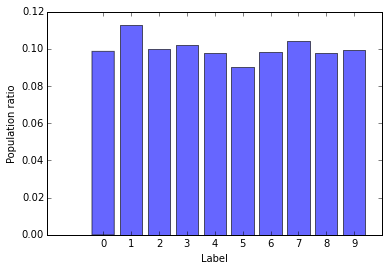

In [5]:
#Plot data distribution

bins = np.linspace(-0.5,9.5,num = 11)
plt.hist(y,bins,alpha=.6,normed = 1,rwidth = .8,label = 'Original ratings')
#plt.legend(loc='upper left')
plt.xlabel('Label')
plt.ylabel('Population ratio')
plt.xticks(np.linspace(0.0,9,num = 10))
plt.show()

In [6]:
#Normalization
X /= X.max()

#Zero mean
avg = np.mean(X,axis = 0)
X -=  avg

#PCA

def pca(imox_mtx, k):
    imox_sctr = np.dot(imox_mtx.T, imox_mtx)
    imox_eigval, imox_eigvec = np.linalg.eig(imox_sctr)
    per = np.real(np.sum(imox_eigval[:k])/ np.sum(imox_eigval))
    print  'percentage: %.4f'%(per), ', number of features: %d' %(k)
    
    max_pos = heapq.nlargest(k, xrange(len(imox_eigval)), key=imox_eigval.__getitem__)
    transmtx = imox_eigvec[:,max_pos]  
    return per, transmtx


In [7]:
#plot pca percentage vs features
'''
f_num = np.linspace(784,0,30).astype(int)
pca_per = [pca(X,i)[0] for i in f_num]

plt.plot(f_num, pca_per)
plt.xlabel('Number of features')
plt.ylabel('Eigenvalue percentage of PCA')
plt.show()
'''

"\nf_num = np.linspace(784,0,30).astype(int)\npca_per = [pca(X,i)[0] for i in f_num]\n\nplt.plot(f_num, pca_per)\nplt.xlabel('Number of features')\nplt.ylabel('Eigenvalue percentage of PCA')\nplt.show()\n"

In [8]:
#PCA transformation
per, transmtx = pca(X,392)
X = np.dot(transmtx.T, X.T)
X = X.T

percentage: 0.9953 , number of features: 392


In [24]:
#Partition into original train and test to compare with teammates. 
#X_train0, X_test0 = X[:60000], X[60000:]
#y_train0, y_test0 = y[:60000], y[60000:]

#Randomlize data since it's put in order from 0 to 9
loc = range(70000)
np.random.shuffle(loc)
X = X[loc,:]
y =  y[loc]

#Partition into two sets / 2-fold CV
parti = X.shape[0]/2
X_train, X_test = X[:parti], X[parti:]
y_train, y_test = y[:parti], y[parti:]
#print np.shape(X_train), type(y_train)

In [39]:
from dnn import dnn
# accu1: use train as train, test as tet
iter_times = 1000
dnn1 = dnn(X_train, y_train, h_size = [20,10], niter = iter_times)
import time as ti
st = ti.time()
dnn1.model()
print ti.time()-st

y_tepd = dnn1.predict(X_test[:,:])
acc1 = dnn1.accuracy(y_test[0:],y_tepd)
print acc1

(392, 20) (20,)
(20, 10) (10,)
(10, 10) (10,)


ValueError: operands could not be broadcast together with shapes (35000,10) (35000,) 

In [21]:
# accu2: use train as test, test as train
nntl = neural_net_two_layer(X_test, y_test, niter = 10000, h_size = 10, reg = 0.001)
import time as ti
st = ti.time()
nntl.model()
print ti.time()-st

y_trpd = nntl.predict(X_train[:,:])
acc2 = nntl.accuracy(y_train[0:],y_trpd)
print acc2


NameError: name 'neural_net_two_layer' is not defined

In [ ]:
# 2-fold average accuracy
print 'average accuracy: %.4f' %(100*(acc1+acc2)/2.), '%'

In [ ]:
xh = [2,5,10,20]
yh = [70.29,88.55,93.33,95.32]
plt.plot(xh,yh)
plt.plot(xh,yh,'o')
plt.xlabel('Hidden layer size')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
xh = [0.0001,0.001,0.01,0.1]
yh = [93.37,93.33,91.87,85.04]
plt.plot(xh,yh,'o')

In [ ]:
#Use last 10000 as test

nntl = neural_net_two_layer(X_train0, y_train0, h_size = 20, reg = 0.001)
import time as ti
st = ti.time()
nntl.model()
print ti.time()-st

y_tepd0 = nntl.predict(X_test0[:,:])
acc = nntl.accuracy(y_test0[0:],y_tepd0)
print acc